In [76]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for scientific plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")


In [77]:
# Cell 2: Load the Excel file
global file_path
file_path = "/Users/Martina.Galletti/Library/CloudStorage/OneDrive-Sony/Desktop/data-artis-2/users-profile/new artis 2 diagnosi + età.docx (1).xlsx"  # Adjust the path as needed
xls = pd.ExcelFile(file_path)
df = xls.parse('Foglio1')

# Drop completely empty rows and columns
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Rename columns for easier access
df.columns = ['UserID', 'Name', 'Gender', 'DOB', 'ClassLevel', 'DiagnosisCodes', 'DiagnosisDescription']

# Convert DOB to datetime and calculate age
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Age'] = pd.Timestamp('today').year - df['DOB'].dt.year

/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_87867/2349621765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")


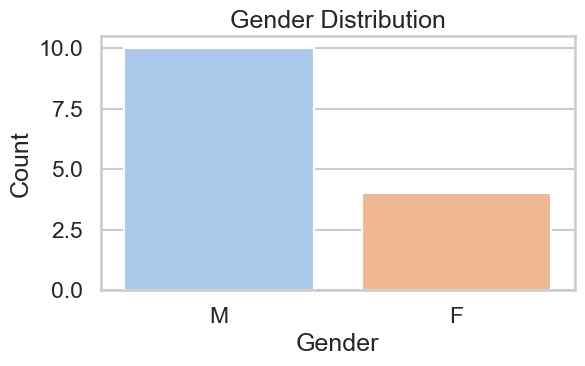

/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_87867/2349621765.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="muted")


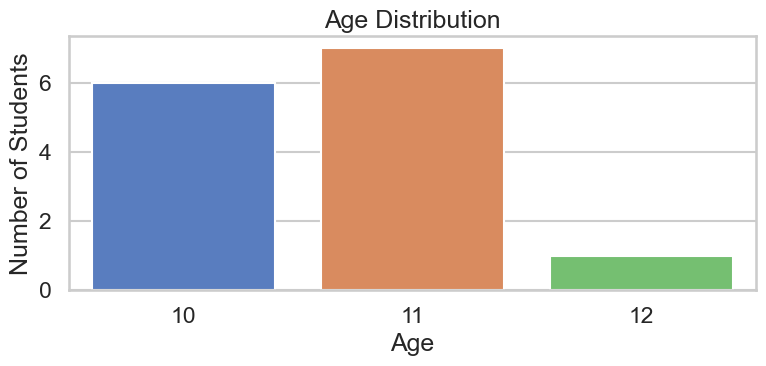

/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_87867/2349621765.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=diagnosis_counts.index, x=diagnosis_counts.values, palette="deep")


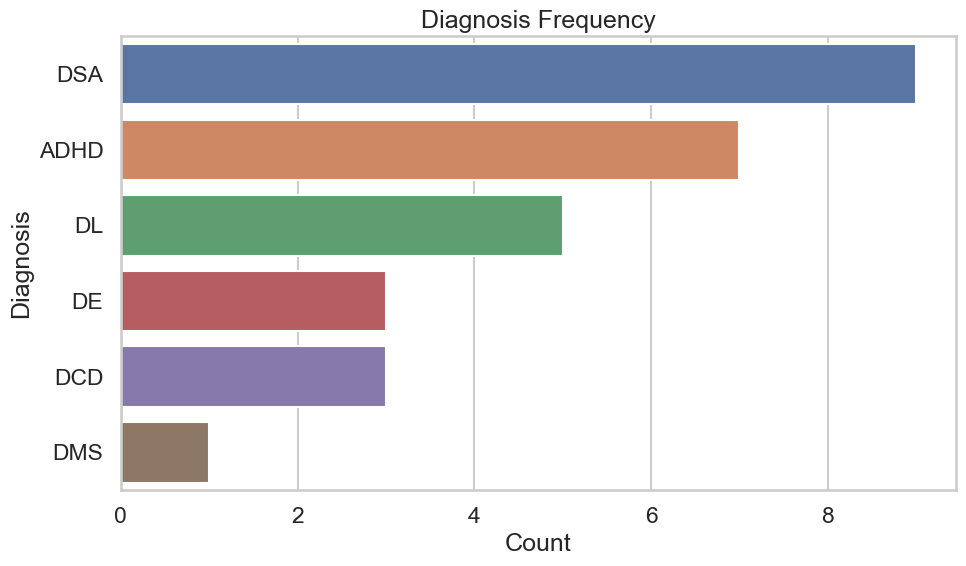

In [78]:

# ---------- Plot 1: Gender Distribution ----------
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ---------- Plot 2: Age Distribution ----------
age_distribution = df['Age'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette="muted")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()

# ---------- Plot 3: Diagnosis Frequency ----------
diagnosis_counts = df['DiagnosisCodes'].dropna().str.split(',').explode().str.strip().value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=diagnosis_counts.index, x=diagnosis_counts.values, palette="deep")
plt.title('Diagnosis Frequency')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()


/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_87867/4205740085.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=combo_counts.index, x=combo_counts.values, palette="tab10")


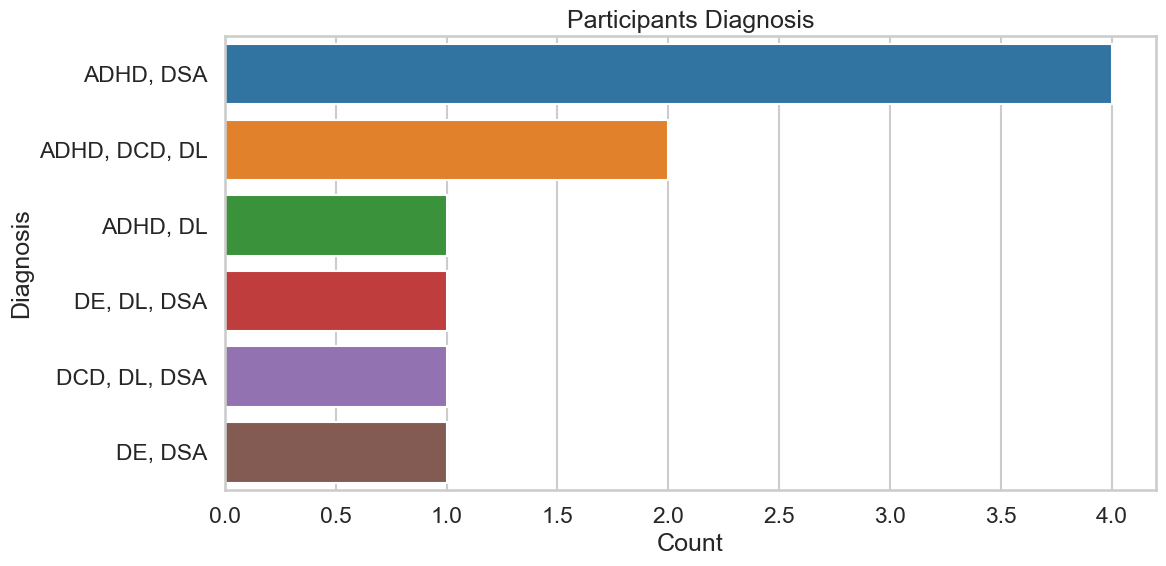

In [79]:
# Split and clean diagnosis codes
df['DiagnosisList'] = df['DiagnosisCodes'].dropna().str.split(',').apply(
    lambda x: [d.strip() for d in x] if isinstance(x, list) else [])

# Count number of diagnoses per user
df['NumDiagnoses'] = df['DiagnosisList'].apply(len)

# Filter users with more than one diagnosis
multi_diag_df = df[df['NumDiagnoses'] > 1].copy()

# Normalize combinations by sorting and removing duplicates
multi_diag_df['CombinedDiagnoses'] = multi_diag_df['DiagnosisList'].apply(
    lambda x: ', '.join(sorted(set(x)))
)

# Count frequency of each unique normalized diagnosis combination
combo_counts = multi_diag_df['CombinedDiagnoses'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=combo_counts.index, x=combo_counts.values, palette="tab10")
plt.title('Participants Diagnosis')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.tight_layout()
plt.show()


/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_87867/2509878018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=combo_counts_all.index, x=combo_counts_all.values, palette="colorblind")


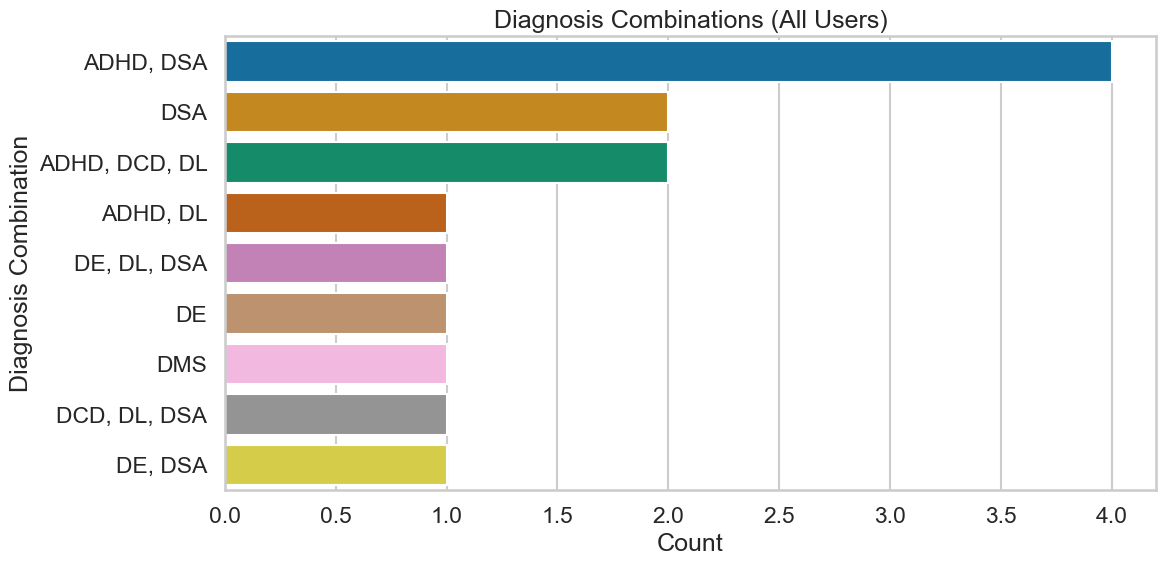

In [80]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=combo_counts_all.index, x=combo_counts_all.values, palette="colorblind")
plt.title('Diagnosis Combinations (All Users)')
plt.xlabel('Count')
plt.ylabel('Diagnosis Combination')
plt.tight_layout()
plt.show()


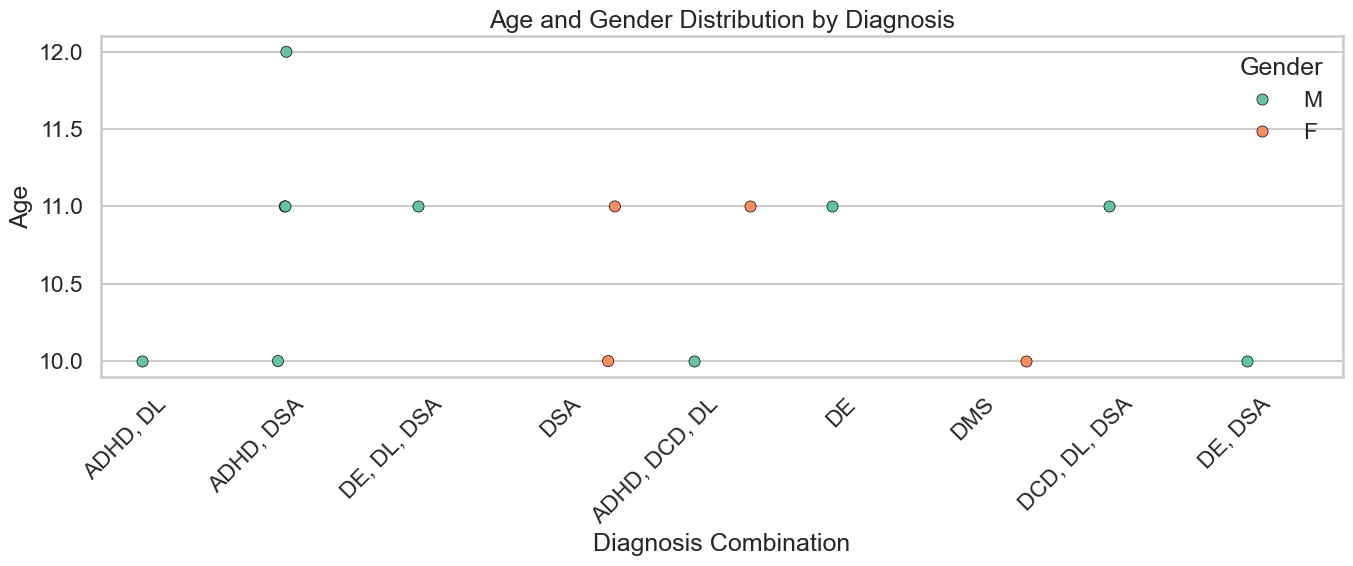

In [81]:

# Process and normalize diagnosis combinations
df['DiagnosisList'] = df['DiagnosisCodes'].dropna().str.split(',').apply(
    lambda x: [d.strip() for d in x] if isinstance(x, list) else [])
df['DiagnosisList'] = df['DiagnosisList'].apply(lambda x: x if isinstance(x, list) else [])
df['CombinedDiagnoses'] = df['DiagnosisList'].apply(lambda x: ', '.join(sorted(set(x))) if x else 'None')

# Simplify label for those with no diagnosis
df['DiagSimple'] = df['CombinedDiagnoses'].apply(
    lambda x: x if x != 'None' else 'No Diagnosis'
)

# Create the combined plot
plt.figure(figsize=(14, 6))
sns.stripplot(
    x='DiagSimple',
    y='Age',
    hue='Gender',
    data=df,
    jitter=True,
    dodge=True,
    palette='Set2',
    size=8,                # ⬅️ Make points larger
    marker='o',            # ⬅️ Use solid round markers
    edgecolor='black',     # ⬅️ Add black edge to distinguish points
    linewidth=0.5
)
plt.title('Age and Gender Distribution by Diagnosis')
plt.xlabel('Diagnosis Combination')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

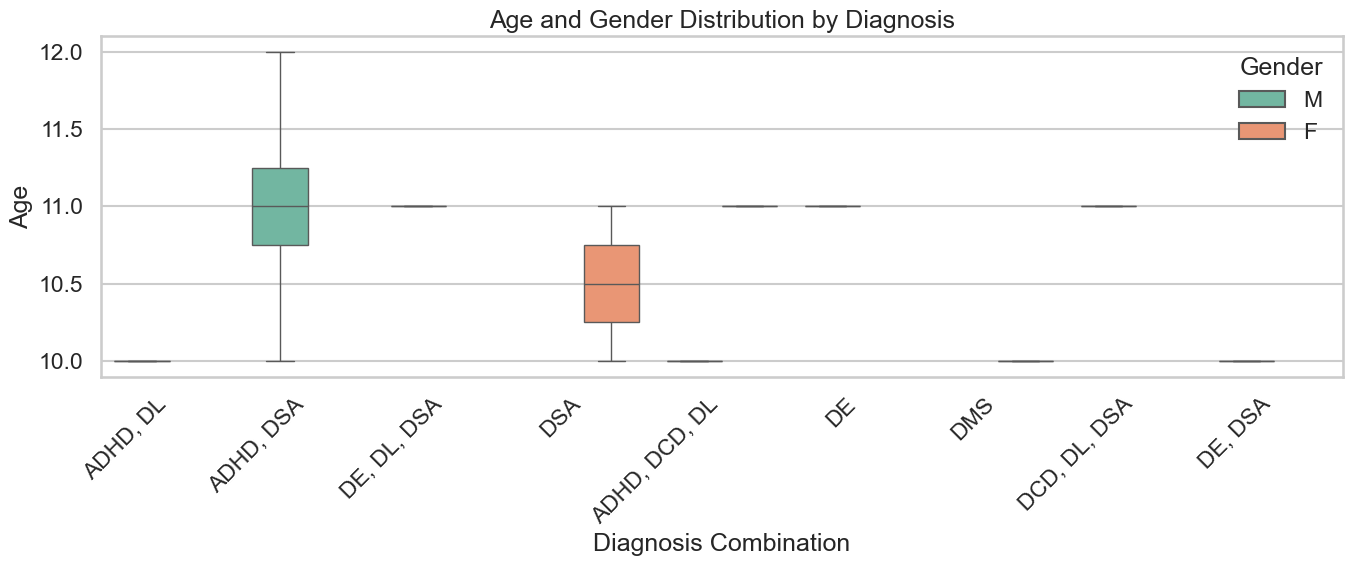

In [82]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='DiagSimple',
    y='Age',
    hue='Gender',
    data=df,
    palette='Set2'
)

plt.title('Age and Gender Distribution by Diagnosis')
plt.xlabel('Diagnosis Combination')
plt.ylabel('Age')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/xg/275fmmmx52b3sq21l50dn4yw0000gn/T/ipykernel_87867/2611277693.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


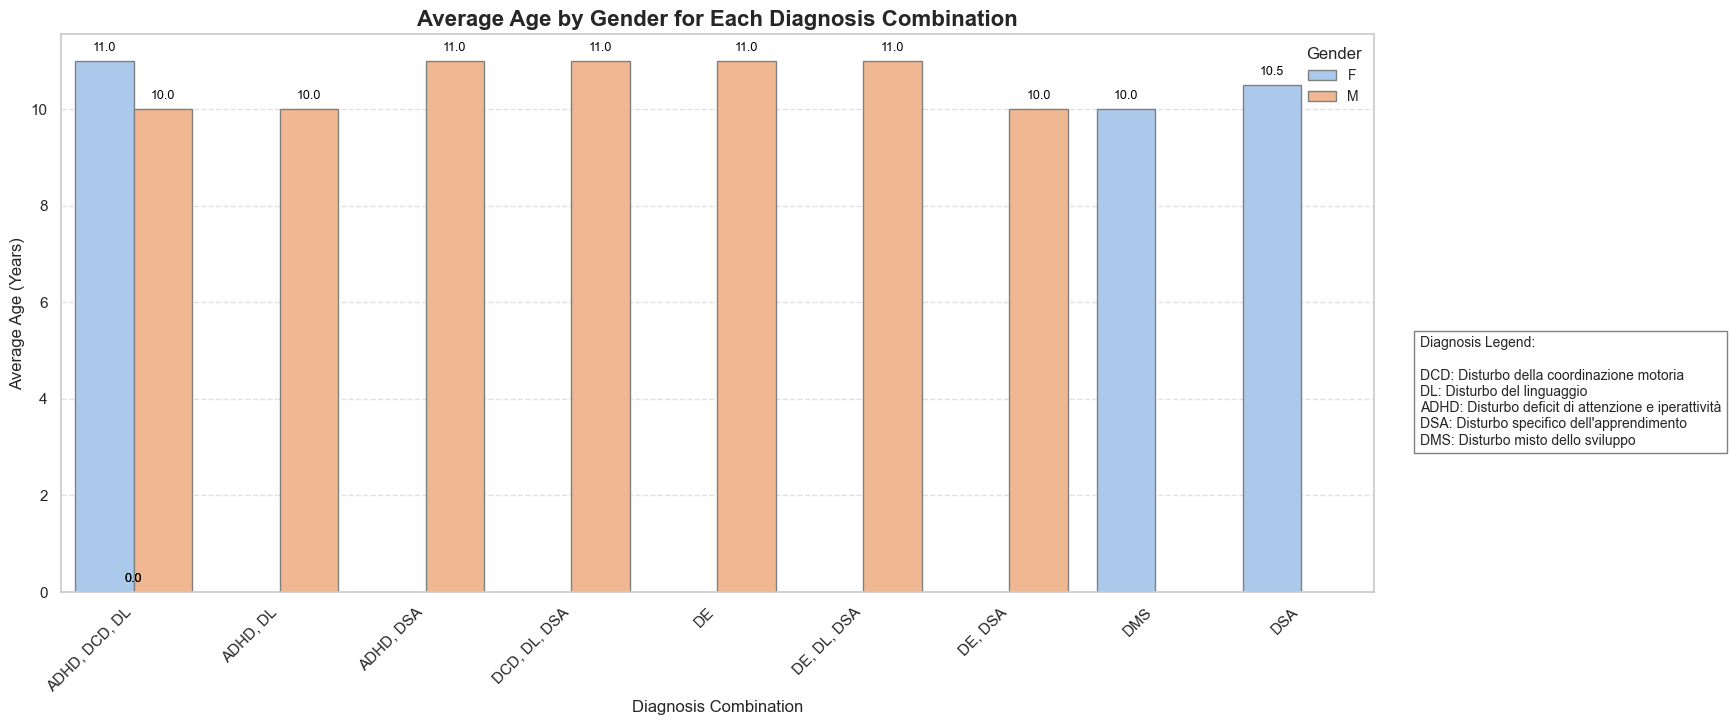

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by diagnosis combination and gender
grouped_stats = df.groupby(['DiagSimple', 'Gender']).agg(
    UserCount=('UserID', 'count'),
    AverageAge=('Age', 'mean')
).reset_index()

# Diagnosis legend (abbreviations and meanings)
diagnosis_legend = {
    "DCD": "Disturbo della coordinazione motoria",
    "DL": "Disturbo del linguaggio",
    "ADHD": "Disturbo deficit di attenzione e iperattività",
    "DSA": "Disturbo specifico dell'apprendimento",
    "DMS": "Disturbo misto dello sviluppo"
}

# Set plot style
sns.set(style='whitegrid', context='notebook')

# Define figure
fig, ax = plt.subplots(figsize=(14, 8))
bar = sns.barplot(
    data=grouped_stats,
    x='DiagSimple',
    y='AverageAge',
    hue='Gender',
    palette='pastel',
    edgecolor='gray',
    ax=ax
)

# Add value labels
for p in bar.patches:
    height = p.get_height()
    bar.annotate(f'{height:.1f}',
                 (p.get_x() + p.get_width() / 2, height),
                 ha='center', va='bottom',
                 fontsize=9, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Plot labels and styling
ax.set_title('Average Age by Gender for Each Diagnosis Combination', fontsize=16, weight='bold')
ax.set_xlabel('Diagnosis Combination', fontsize=12)
ax.set_ylabel('Average Age (Years)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Gender', title_fontsize=12, fontsize=10, loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Add custom text box as a legend for diagnoses
# Add diagnosis legend as text on the right
legend_text = "\n".join([f"{k}: {v}" for k, v in diagnosis_legend.items()])
fig.text(1.02, 0.5, f"Diagnosis Legend:\n\n{legend_text}",
         va='center', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Make space for the legend
plt.show()


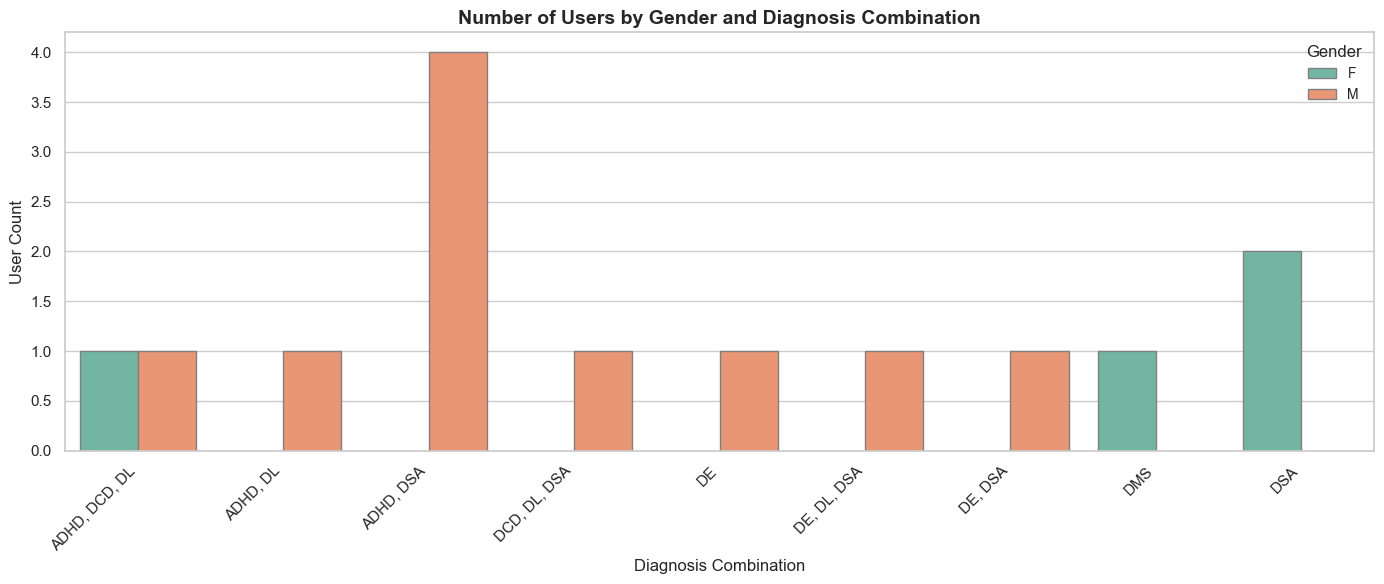

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diagnosis legend (optional, for later display)
diagnosis_legend = {
    "DCD": "Disturbo della coordinazione motoria",
    "DL": "Disturbo del linguaggio",
    "ADHD": "Disturbo deficit di attenzione e iperattività",
    "DSA": "Disturbo specifico dell'apprendimento",
    "DMS": "Disturbo misto dello sviluppo"
}

# Group by diagnosis combination and gender
gender_diag_counts = df.groupby(['DiagSimple', 'Gender']).agg(
    UserCount=('UserID', 'count')
).reset_index()

# Plot setup
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')

# Plot grouped bar chart
sns.barplot(
    data=gender_diag_counts,
    x='DiagSimple',
    y='UserCount',
    hue='Gender',
    palette='Set2',
    edgecolor='gray'
)

# Titles and labels
plt.title('Number of Users by Gender and Diagnosis Combination', fontsize=14, weight='bold')
plt.xlabel('Diagnosis Combination', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
# Add diagnosis legend as text on the right
legend_text = "\n".join([f"{k}: {v}" for k, v in diagnosis_legend.items()])
fig.text(1.02, 0.5, f"Diagnosis Legend:\n\n{legend_text}",
         va='center', ha='left', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray'))

plt.tight_layout()

plt.show()
